In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('insurance_part2_data.csv')

In [3]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [5]:
df.shape

(3000, 10)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [7]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [8]:
df.describe(include ='all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [9]:
def missing_datas(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [10]:
missing_data = missing_datas(df)
print(missing_data)

              Total  Percent
Destination       0      0.0
Product Name      0      0.0
Sales             0      0.0
Duration          0      0.0
Channel           0      0.0
Commision         0      0.0
Claimed           0      0.0
Type              0      0.0
Agency_Code       0      0.0
Age               0      0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026417ED16D8>,
      dtype=object)

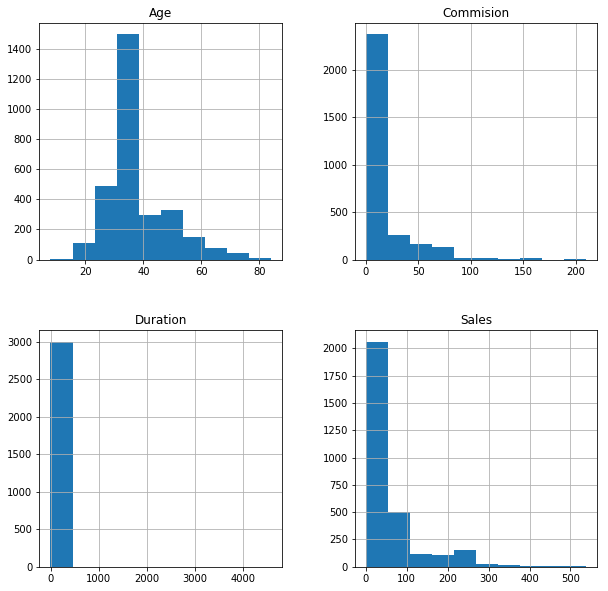

In [11]:
df.hist(figsize=(10,10))

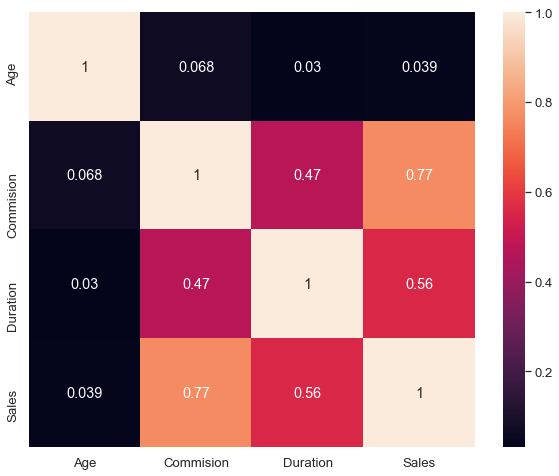

In [12]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df[['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel', 'Duration', 'Sales','Product Name','Destination']].corr(), annot=True)

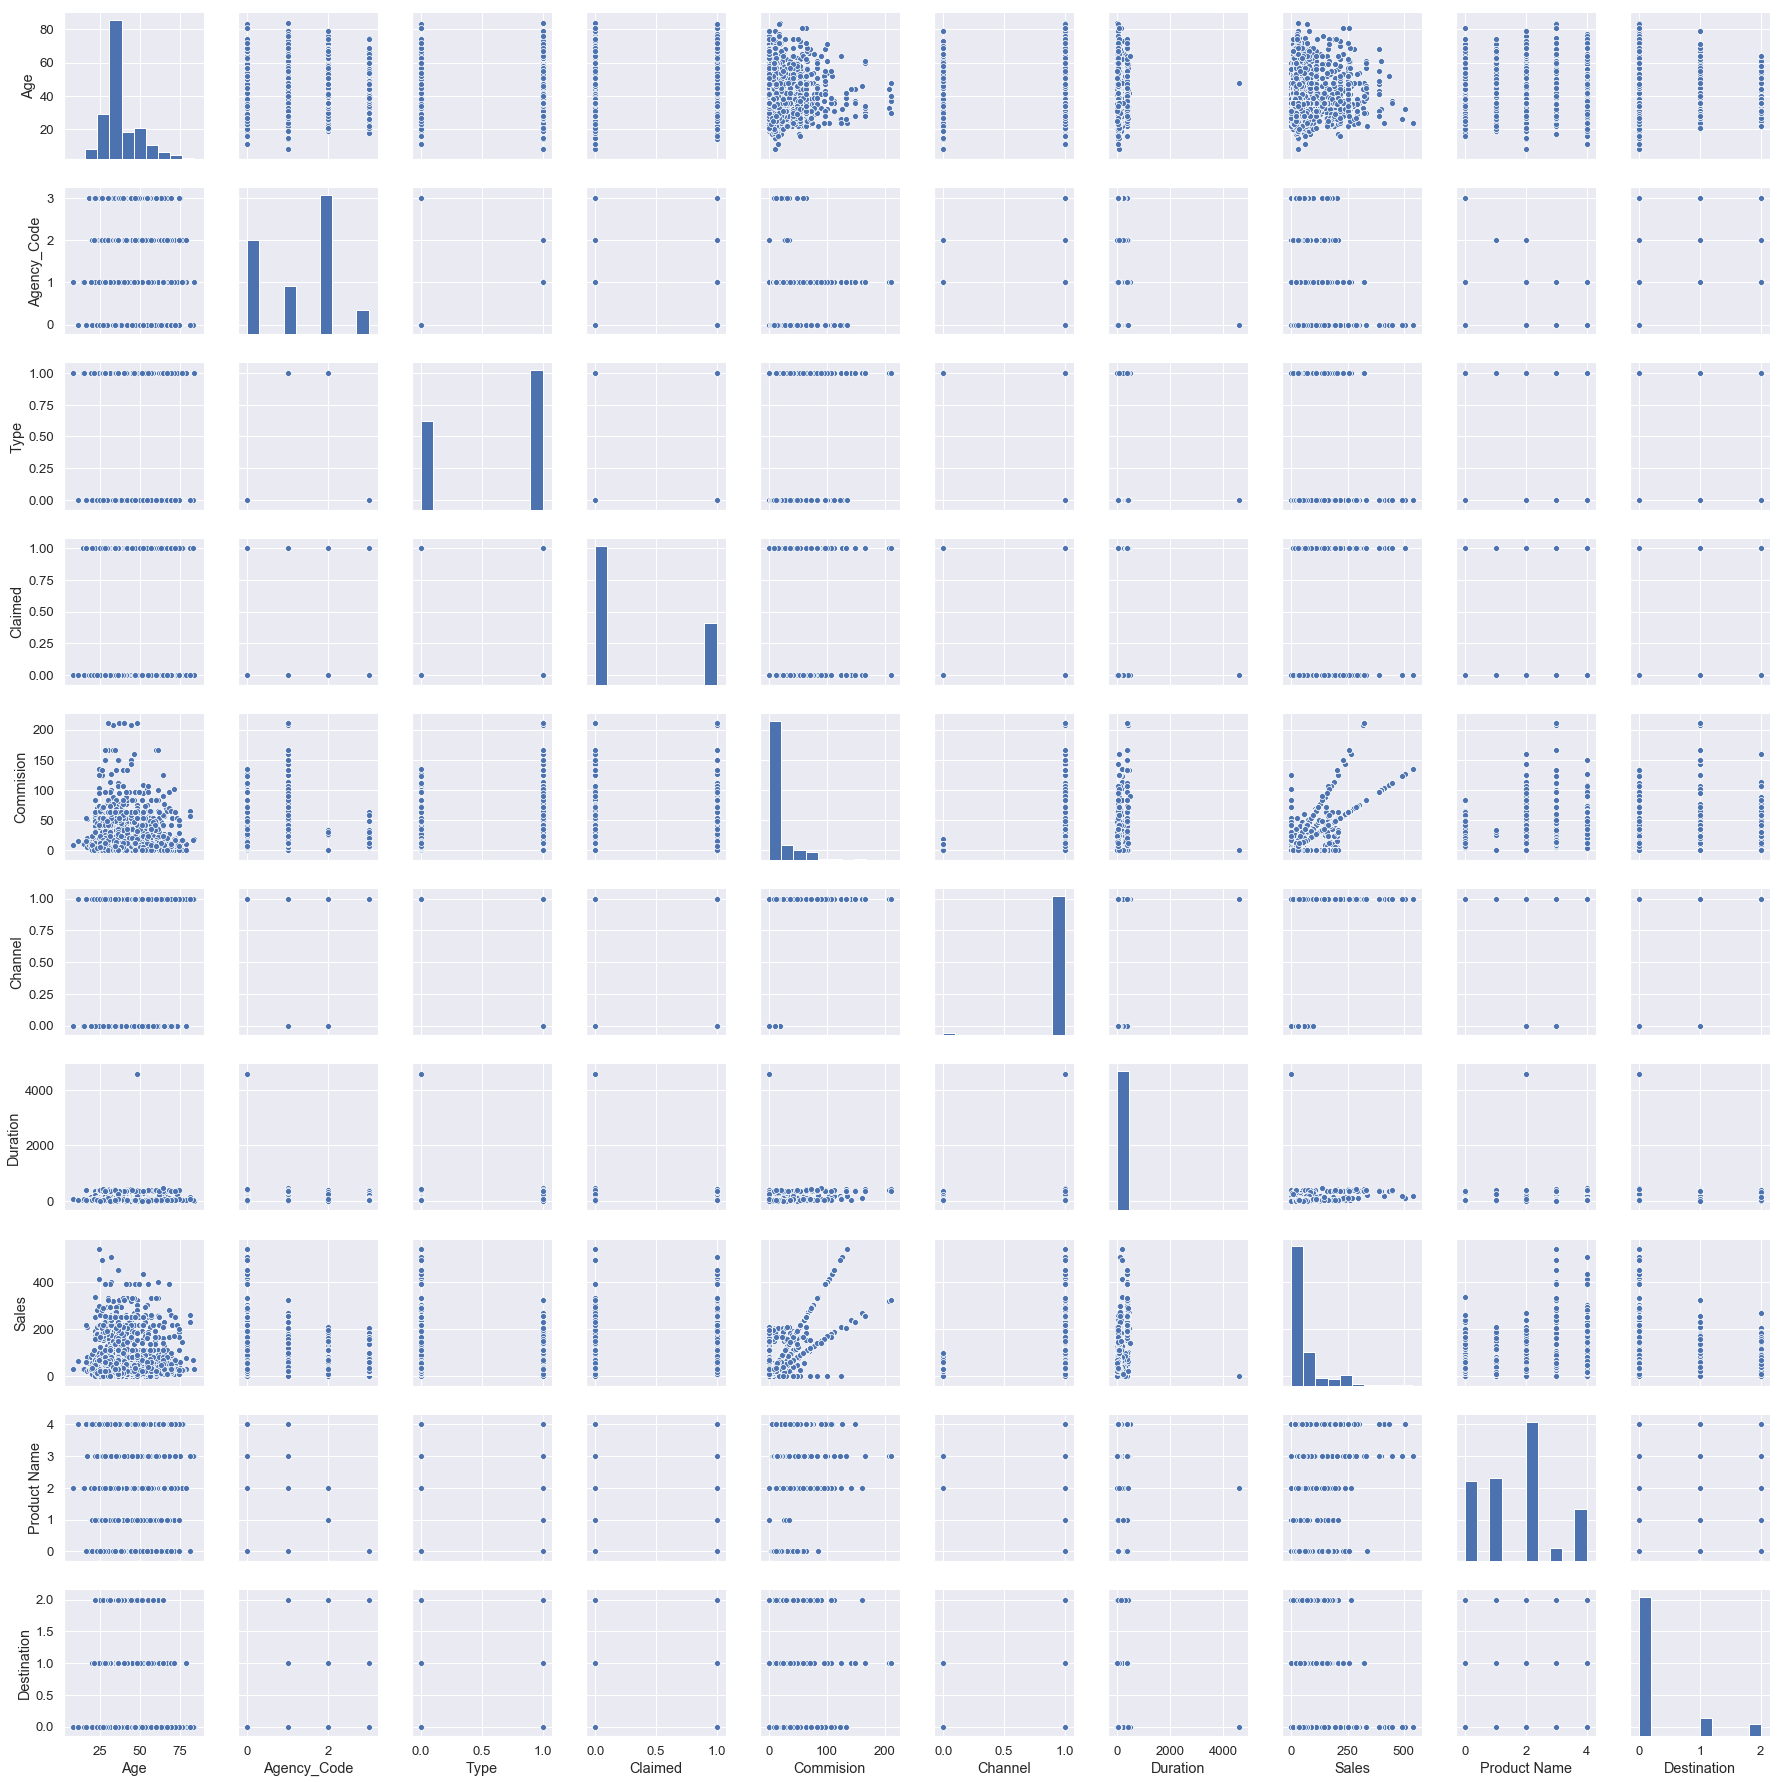

In [112]:
sns.pairplot(df)
plt.show()

In [13]:
for feature in df.columns :
    if df[feature].dtype == 'object':
         df[feature] = pd.Categorical(df[feature]).codes

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null int8
Type            3000 non-null int8
Claimed         3000 non-null int8
Commision       3000 non-null float64
Channel         3000 non-null int8
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null int8
Destination     3000 non-null int8
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.4 KB


In [15]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [16]:
df1= df.round({'Commision': 0, 'Sales': 0})

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null int8
Type            3000 non-null int8
Claimed         3000 non-null int8
Commision       3000 non-null float64
Channel         3000 non-null int8
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null int8
Destination     3000 non-null int8
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.4 KB


In [18]:
df1.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,1.0,1,7,3.0,2,0
1,36,2,1,0,0.0,1,34,20.0,2,0
2,39,1,1,0,6.0,1,3,10.0,2,1
3,36,2,1,0,0.0,1,4,26.0,1,0
4,33,3,0,0,6.0,1,53,18.0,0,0


In [19]:
for feature in df1.columns :
    if df1[feature].dtype == 'float64':
         df1[feature] = (df1[feature]).astype('int32')

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null int8
Type            3000 non-null int8
Claimed         3000 non-null int8
Commision       3000 non-null int32
Channel         3000 non-null int8
Duration        3000 non-null int64
Sales           3000 non-null int32
Product Name    3000 non-null int8
Destination     3000 non-null int8
dtypes: int32(2), int64(2), int8(6)
memory usage: 88.0 KB


In [21]:
df1.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,1,1,7,3,2,0
1,36,2,1,0,0,1,34,20,2,0
2,39,1,1,0,6,1,3,10,2,1
3,36,2,1,0,0,1,4,26,1,0
4,33,3,0,0,6,1,53,18,0,0
5,45,3,0,1,16,1,8,45,0,0
6,61,1,1,0,36,1,30,59,2,1
7,36,2,1,0,0,1,16,80,1,0
8,36,2,1,0,0,1,19,14,1,0
9,36,2,1,0,0,1,42,43,1,0


In [22]:
df.shape

(3000, 10)

In [23]:
df.duplicated().sum()

139

In [24]:
df.drop_duplicates().shape

(2861, 10)

In [25]:
x = df1.drop("Claimed" , axis = 1)

y = df1.pop("Claimed")

In [26]:
x_train ,x_test, train_labels, test_labels = train_test_split (x,y,test_size=.30 , random_state = 1)

In [27]:
dt_model = DecisionTreeClassifier (criterion = 'gini')

In [28]:
dt_model.fit(x_train ,train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
train_char_label= ['No','Yes']

In [30]:
Credit_Tree_File= open ('d:\credit_tree.dot', 'w')

In [31]:
dot_data = tree.export_graphviz(dt_model, out_file = Credit_Tree_File, feature_names = list(x_train) , class_names = ("train_char_label"))

In [32]:
Credit_Tree_File.close()

In [33]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini',max_depth= 7 ,min_samples_leaf= 10 ,min_samples_split = 30)

In [34]:
reg_dt_model.fit(x_train ,train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
Credit_Tree_regular= open ('d:\credit_tree_regular.dot', 'w')

In [36]:
dot_data = tree.export_graphviz(reg_dt_model, out_file = Credit_Tree_regular, feature_names = list(x_train) , class_names = "train_char_label")

In [37]:
Credit_Tree_regular.close()

In [38]:
reg_dt_model.feature_importances_

array([0.04801414, 0.51193665, 0.00633386, 0.02233317, 0.        ,
       0.08961079, 0.25638083, 0.06539055, 0.        ])

In [39]:
print (pd.DataFrame (dt_model.feature_importances_,columns = ["Imp"], index = x_train.columns))

                   Imp
Age           0.183370
Agency_Code   0.196326
Type          0.003095
Commision     0.072192
Channel       0.007262
Duration      0.274911
Sales         0.212336
Product Name  0.035760
Destination   0.014749


In [40]:
ytrain_predict =reg_dt_model.predict(x_train)
ytest_predict =reg_dt_model.predict(x_test)

In [41]:
ytrain_predict1 =reg_dt_model.predict_proba(x_train)
ytest_predict1 =reg_dt_model.predict_proba(x_test)

In [42]:
ytrain_predict

array([0, 0, 1, ..., 0, 0, 1], dtype=int8)

In [43]:
ytrain_predict1

array([[1.        , 0.        ],
       [0.71830986, 0.28169014],
       [0.18779343, 0.81220657],
       ...,
       [0.71830986, 0.28169014],
       [0.95918367, 0.04081633],
       [0.41269841, 0.58730159]])

In [44]:
probs = reg_dt_model.predict_proba(x_train)

In [45]:
probs = probs[:,1]

In [46]:
auc = roc_auc_score(train_labels, probs)

In [47]:
auc

0.8636635796031166

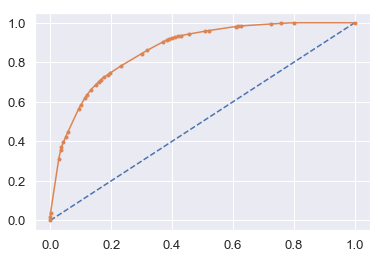

In [48]:
fpr,tpr,thresholds = roc_curve(train_labels, probs)
plt.plot([0,1],[0,1],linestyle ='--')
plt.plot (fpr,tpr,marker = '.')
plt.show()

In [49]:
probs = reg_dt_model.predict_proba(x_test)

In [50]:
probs = probs[:,1]

In [51]:
auc = roc_auc_score(test_labels, probs)

In [52]:
auc

0.7956828687491246

In [53]:
## hold out sample (test data) is not performing as development sample (train data)

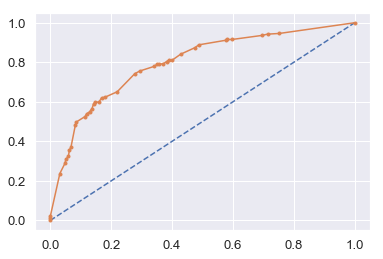

In [54]:
fpr,tpr,thresholds = roc_curve(test_labels, probs)
plt.plot([0,1],[0,1],linestyle ='--')
plt.plot (fpr,tpr,marker = '.')
plt.show()

In [55]:
print(classification_report(train_labels , ytrain_predict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.86      1471
           1       0.70      0.62      0.66       629

    accuracy                           0.81      2100
   macro avg       0.77      0.75      0.76      2100
weighted avg       0.80      0.81      0.80      2100



In [56]:
print(classification_report(test_labels , ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       605
           1       0.69      0.53      0.60       295

    accuracy                           0.77       900
   macro avg       0.74      0.71      0.72       900
weighted avg       0.76      0.77      0.76       900



In [57]:
confusion_matrix(train_labels , ytrain_predict)

array([[1303,  168],
       [ 239,  390]], dtype=int64)

In [58]:
confusion_matrix(test_labels , ytest_predict)

array([[536,  69],
       [140, 155]], dtype=int64)

In [59]:
reg_dt_model.score(x_train,train_labels)

0.8061904761904762

In [60]:
### Accuracy score of development data (trained data) is 80%

In [61]:
reg_dt_model.score(x_test,test_labels)

0.7677777777777778

In [62]:
### Accuracy score of Hold out data (test data) is 77%

In [63]:
rfcl = RandomForestClassifier (n_estimators = 500,oob_score = True,max_depth = 10 ,max_features= 5,min_samples_leaf = 20,min_samples_split=60, )

In [64]:
rfcl = rfcl.fit(x_train,train_labels)

In [65]:
rfcl.oob_score

True

In [66]:
rfcl.oob_score_

0.7828571428571428

In [67]:
param_grid = {'max_depth': [7,10],
              'max_features':[4,6],
              'min_samples_leaf': [20,80],
              'min_samples_split':[60,120],
              'n_estimators': [300,500]}

In [68]:
rfcl = RandomForestClassifier()

In [69]:
grid_search= GridSearchCV (estimator= rfcl , param_grid = param_grid ,cv=3)

In [70]:
grid_search.fit(x_train,train_labels)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [71]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 6,
 'min_samples_leaf': 20,
 'min_samples_split': 60,
 'n_estimators': 300}

In [72]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=60,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
best_grid = grid_search.best_estimator_

In [74]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [75]:
confusion_matrix(train_labels , ytrain_predict)

array([[1335,  136],
       [ 270,  359]], dtype=int64)

In [76]:
confusion_matrix(test_labels , ytest_predict)

array([[555,  50],
       [159, 136]], dtype=int64)

In [77]:
print(classification_report(train_labels , ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1471
           1       0.73      0.57      0.64       629

    accuracy                           0.81      2100
   macro avg       0.78      0.74      0.75      2100
weighted avg       0.80      0.81      0.80      2100



In [78]:
print(classification_report(test_labels , ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.73      0.46      0.57       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.70       900
weighted avg       0.76      0.77      0.75       900



In [79]:
probs = best_grid.predict_proba(x_train)

In [80]:
probs = probs [:,1]

In [81]:
auc = roc_auc_score(train_labels, probs)

In [82]:
auc

0.8564169600079544

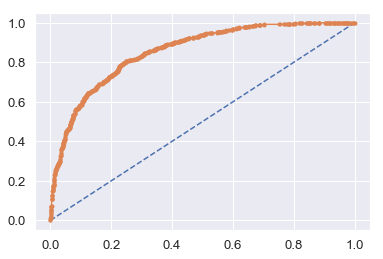

In [83]:
fpr,tpr,thresholds = roc_curve(train_labels, probs)
plt.plot([0,1],[0,1],linestyle ='--')
plt.plot (fpr,tpr,marker = '.')
plt.show()

In [84]:
probs = best_grid.predict_proba(x_test)

In [85]:
probs = probs [:,1]

In [86]:
auc = roc_auc_score(test_labels, probs)

In [87]:
auc

0.8205631040762011

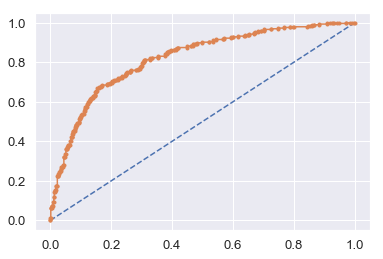

In [88]:
fpr,tpr,thresholds = roc_curve(test_labels, probs)
plt.plot([0,1],[0,1],linestyle ='--')
plt.plot (fpr,tpr,marker = '.')
plt.show()

In [89]:
### testing data is underperforming than the training data

In [90]:
sc = StandardScaler()

In [91]:
x_train= sc.fit_transform(x_train)

In [92]:
x_train

array([[-0.19192502,  0.72815922,  0.80520286, ..., -0.57339307,
         0.24642411, -0.43926017],
       [-0.19192502,  0.72815922,  0.80520286, ..., -0.26941868,
         0.24642411,  1.27851702],
       [-0.97188154, -1.28518425, -1.24192306, ...,  1.74786589,
         1.83381865, -0.43926017],
       ...,
       [-0.19192502,  0.72815922,  0.80520286, ...,  0.02073869,
         0.24642411, -0.43926017],
       [ 0.58803151,  1.73483096, -1.24192306, ..., -0.60102711,
        -1.34097044, -0.43926017],
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.54575904,
         1.83381865, -0.43926017]])

In [93]:
x_test= sc.transform(x_test)

In [94]:
x_test

array([[-1.55684893, -0.27851251,  0.80520286, ...,  0.1865429 ,
        -1.34097044,  2.99629421],
       [ 1.66047173, -1.28518425, -1.24192306, ..., -0.49049097,
        -1.34097044, -0.43926017],
       [-0.87438698, -1.28518425, -1.24192306, ..., -0.62866114,
        -1.34097044, -0.43926017],
       ...,
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.47667395,
        -1.34097044, -0.43926017],
       [ 1.07550434,  1.73483096, -1.24192306, ..., -0.4352229 ,
        -1.34097044, -0.43926017],
       [-0.28941958,  1.73483096, -1.24192306, ..., -0.49049097,
        -1.34097044, -0.43926017]])

In [95]:
clf= MLPClassifier (hidden_layer_sizes= 100, max_iter = 500 , solver = 'sgd',verbose= True ,random_state = 21 , tol = 0.01)

In [96]:
clf.fit(x_train,train_labels)
y_pred = clf.predict(x_test)

Iteration 1, loss = 0.64459808
Iteration 2, loss = 0.62689701
Iteration 3, loss = 0.60662827
Iteration 4, loss = 0.58889516
Iteration 5, loss = 0.57375105
Iteration 6, loss = 0.56124572
Iteration 7, loss = 0.55072077
Iteration 8, loss = 0.54232140
Iteration 9, loss = 0.53526169
Iteration 10, loss = 0.52916462
Iteration 11, loss = 0.52399777
Iteration 12, loss = 0.51942432
Iteration 13, loss = 0.51563518
Iteration 14, loss = 0.51211608
Iteration 15, loss = 0.50920658
Iteration 16, loss = 0.50658803
Iteration 17, loss = 0.50424266
Iteration 18, loss = 0.50215887
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


In [97]:
predict2 = clf.predict(x_train)
confusion_matrix(train_labels , predict2)

array([[1407,   64],
       [ 441,  188]], dtype=int64)

In [98]:
confusion_matrix(test_labels , y_pred)

array([[587,  18],
       [217,  78]], dtype=int64)

In [99]:
print(classification_report(train_labels , predict2))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85      1471
           1       0.75      0.30      0.43       629

    accuracy                           0.76      2100
   macro avg       0.75      0.63      0.64      2100
weighted avg       0.76      0.76      0.72      2100



In [100]:
print(classification_report(test_labels , y_pred))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83       605
           1       0.81      0.26      0.40       295

    accuracy                           0.74       900
   macro avg       0.77      0.62      0.62       900
weighted avg       0.76      0.74      0.69       900



In [101]:
probs = clf.predict_proba(x_train)

In [102]:
probs = probs [:,1]

In [103]:
auc = roc_auc_score(train_labels, probs)

In [104]:
auc

0.7991432669122916

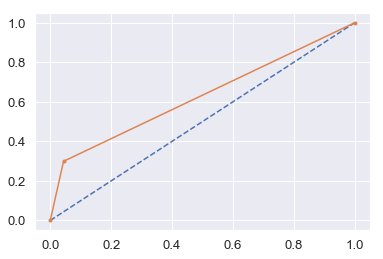

In [105]:
fpr,tpr,thresholds = roc_curve(train_labels , predict2)
plt.plot([0,1],[0,1],linestyle ='--')
plt.plot (fpr,tpr,marker = '.')
plt.show()

In [106]:
probs = clf.predict_proba(x_test)

In [107]:
probs = probs [:,1]

In [108]:
auc = roc_auc_score(test_labels, probs)

In [109]:
auc

0.7921753747023393

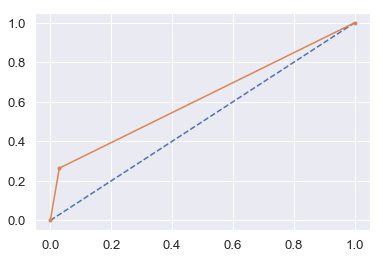

In [110]:
fpr,tpr,thresholds = roc_curve(test_labels , y_pred)
plt.plot([0,1],[0,1],linestyle ='--')
plt.plot (fpr,tpr,marker = '.')
plt.show()

In [111]:
### This model has given equivalent performance of both traing and testing data